In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones:

- initial_temps = [1e5, 5e5, 1e6, 5e6]
- final_temps = [1.0, 10.0, 50.0]
- alphas = [0.95, 0.97, 0.98, 0.99]
- max_iters = [10_000,50_000, 100_000]

In [41]:
df = pd.read_csv("../results/configurations/sa_configurations2.csv")

In [42]:
print(df.head())
print(df.info())

  config_id  initial_temp  final_temp  alpha  max_iter  time  final_fitness  \
0   cfg_001      100000.0         1.0   0.95     10000  0.39           16.3   
1   cfg_002      100000.0         1.0   0.95     50000  0.42           16.3   
2   cfg_003      100000.0         1.0   0.95    100000  0.46           16.3   
3   cfg_004      100000.0         1.0   0.97     10000  0.62           16.3   
4   cfg_005      100000.0         1.0   0.97     50000  0.66           16.3   

   validity  
0      True  
1      True  
2      True  
3      True  
4      True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   config_id      144 non-null    object 
 1   initial_temp   144 non-null    float64
 2   final_temp     144 non-null    float64
 3   alpha          144 non-null    float64
 4   max_iter       144 non-null    int64  
 5   time           144 non-n

In [43]:
valid_df = df[df["validity"]].copy()

best_config = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).iloc[0]

In [44]:
print("Mejor configuración encontrada:")
print(best_config)

Mejor configuración encontrada:
config_id         cfg_027
initial_temp     100000.0
final_temp           50.0
alpha                0.95
max_iter           100000
time                 0.25
final_fitness        16.3
validity             True
Name: 26, dtype: object


In [45]:
print("Resumen estadístico de las soluciones válidas:")
print(valid_df.describe())

Resumen estadístico de las soluciones válidas:
       initial_temp  final_temp       alpha       max_iter        time  \
count  1.440000e+02  144.000000  144.000000     144.000000  144.000000   
mean   1.650000e+06   20.333333    0.972500   53333.333333    1.005764   
std    1.967072e+06   21.371179    0.014842   36946.379593    0.631444   
min    1.000000e+05    1.000000    0.950000   10000.000000    0.250000   
25%    4.000000e+05    1.000000    0.965000   10000.000000    0.497500   
50%    7.500000e+05   10.000000    0.975000   50000.000000    0.800000   
75%    2.000000e+06   50.000000    0.982500  100000.000000    1.350000   
max    5.000000e+06   50.000000    0.990000  100000.000000    2.640000   

       final_fitness  
count     144.000000  
mean       16.286111  
std         0.126608  
min        14.900000  
25%        16.300000  
50%        16.300000  
75%        16.300000  
max        16.300000  


In [46]:
print("Promedio de tiempo por configuración:")
print(valid_df["time"].mean())

Promedio de tiempo por configuración:
1.0057638888888887


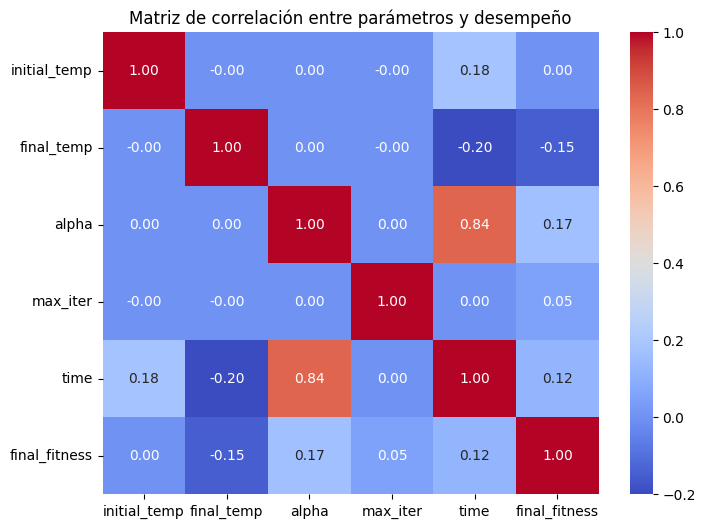

In [47]:
corr = valid_df[
    ["initial_temp", "final_temp", "alpha", "max_iter", "time", "final_fitness"]
].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre parámetros y desempeño")
plt.show()

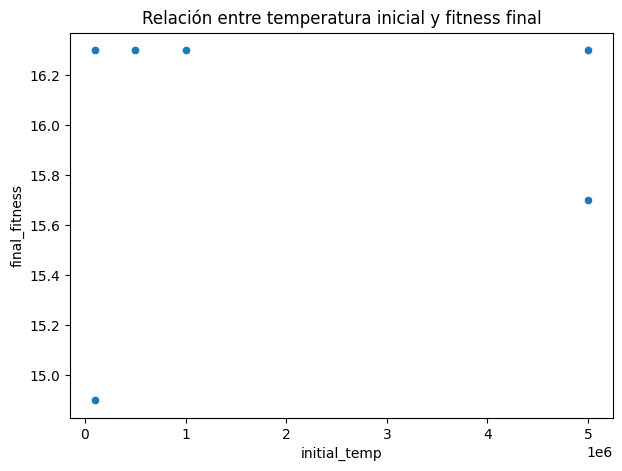

In [48]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="initial_temp", y="final_fitness")
plt.title("Relación entre temperatura inicial y fitness final")
plt.show()

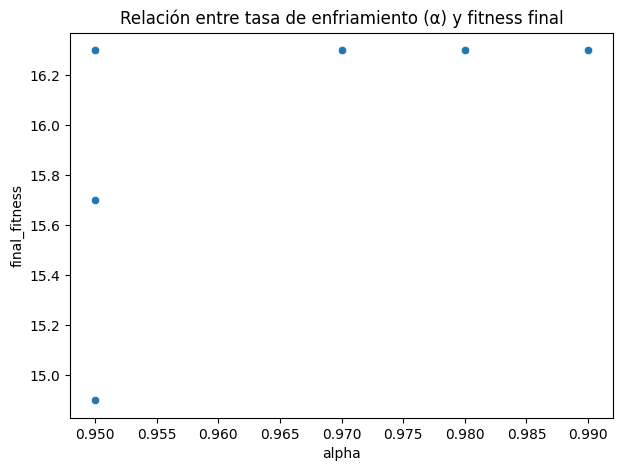

In [49]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="alpha", y="final_fitness")
plt.title("Relación entre tasa de enfriamiento (α) y fitness final")
plt.show()

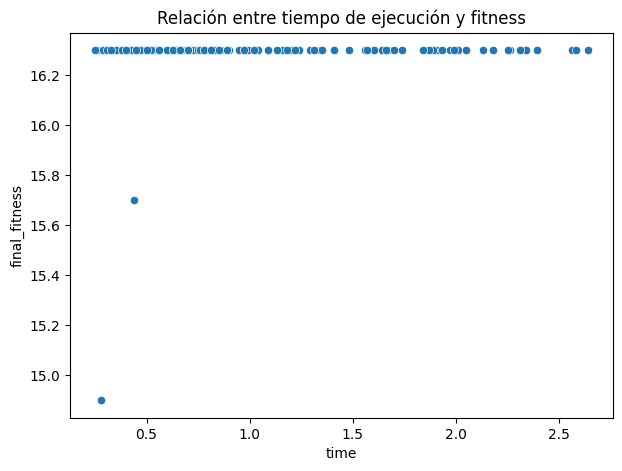

In [50]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=valid_df, x="time", y="final_fitness")
plt.title("Relación entre tiempo de ejecución y fitness")
plt.show()

In [51]:
valid_df["fitness_per_time"] = valid_df["final_fitness"] / valid_df["time"]
best_efficiency = valid_df.loc[valid_df["fitness_per_time"].idxmax()]

print("Configuración más eficiente (fitness/tiempo):")
print(best_efficiency)

Configuración más eficiente (fitness/tiempo):
config_id            cfg_027
initial_temp        100000.0
final_temp              50.0
alpha                   0.95
max_iter              100000
time                    0.25
final_fitness           16.3
validity                True
fitness_per_time        65.2
Name: 26, dtype: object


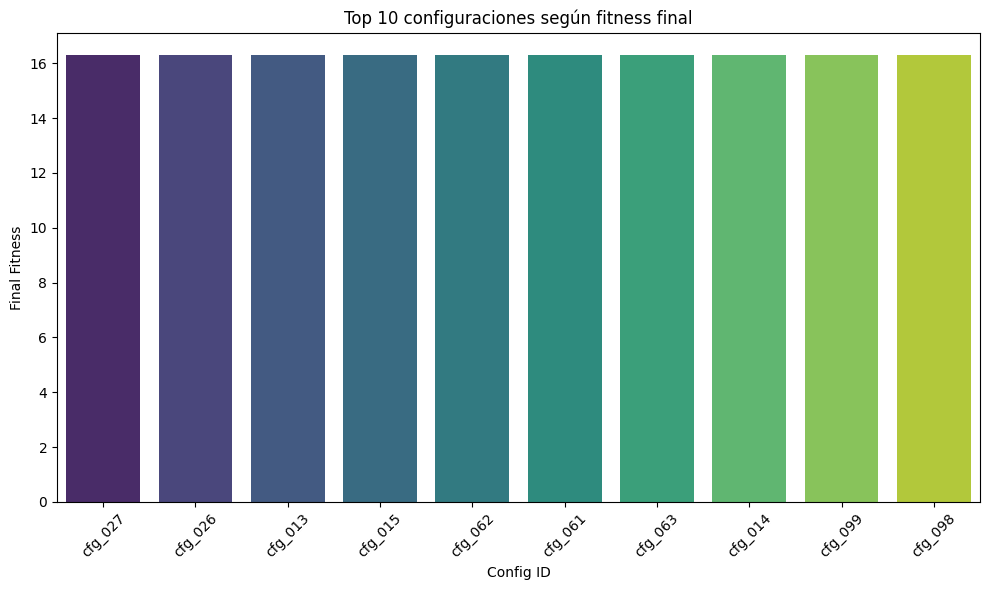

In [52]:
ranking = valid_df.sort_values(
    by=["final_fitness", "time"], ascending=[False, True]
).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=ranking,
    x="config_id",
    y="final_fitness",
    hue="config_id",
    palette="viridis",
    legend=False,
)
plt.title("Top 10 configuraciones según fitness final")
plt.xlabel("Config ID")
plt.ylabel("Final Fitness")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

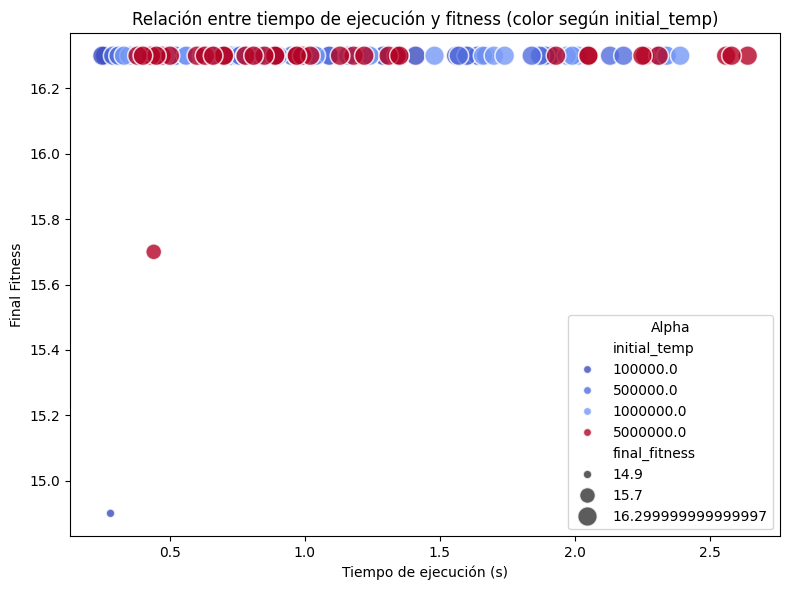

In [53]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="initial_temp",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según initial_temp)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

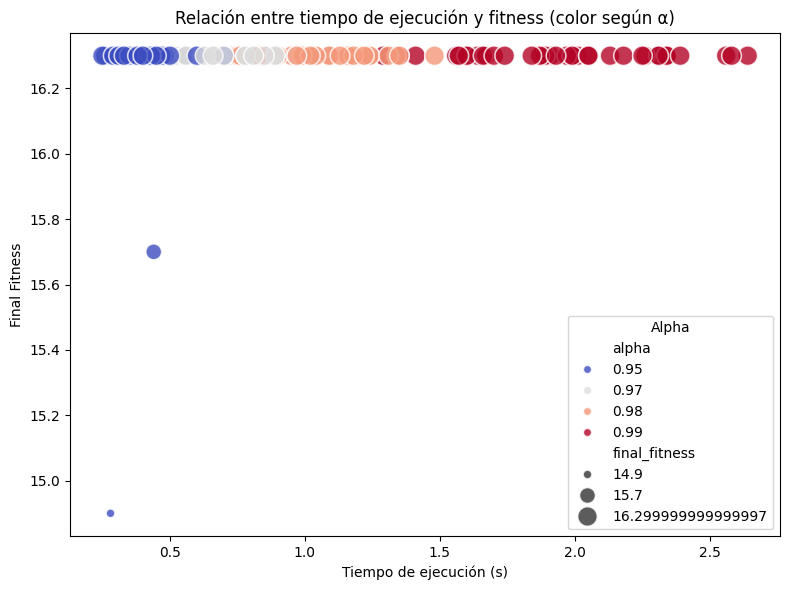

In [54]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=valid_df,
    x="time",
    y="final_fitness",
    hue="alpha",
    palette="coolwarm",
    size="final_fitness",
    sizes=(40, 200),
    alpha=0.8,
)
plt.title("Relación entre tiempo de ejecución y fitness (color según α)")
plt.xlabel("Tiempo de ejecución (s)")
plt.ylabel("Final Fitness")
plt.legend(title="Alpha")
plt.tight_layout()
plt.show()

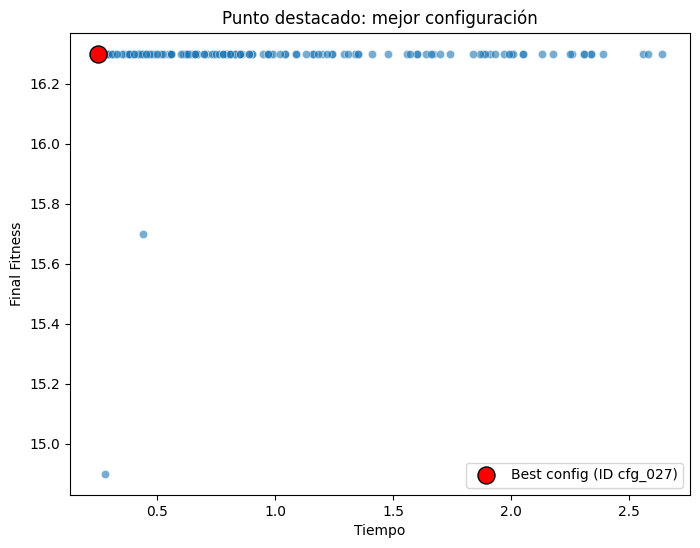

In [55]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=valid_df, x="time", y="final_fitness", alpha=0.6)
plt.scatter(
    best_config["time"],
    best_config["final_fitness"],
    color="red",
    s=150,
    edgecolor="black",
    label=f"Best config (ID {best_config['config_id']})",
)
plt.legend()
plt.title("Punto destacado: mejor configuración")
plt.xlabel("Tiempo")
plt.ylabel("Final Fitness")
plt.show()